<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 image classification project

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context=ssl._create_unverified_context

# Data

CIFAR10 contains 50000 images 32x32 colour training images,labeled over 10 categories and 10000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

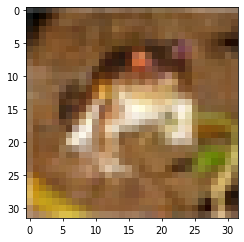

In [5]:
#Looking the images
plt.figure(figsize=(4,4),dpi=70)
plt.imshow(x_train[0]);

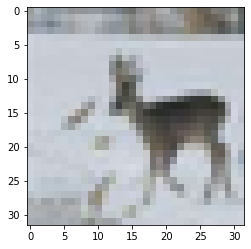

In [6]:
plt.imshow(x_train[20]);

# **PreProcessing**

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
x_train.max()

255

In [10]:
#Normalizing the values
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
from tensorflow.keras.utils import to_categorical #As images are multicoloured 
y_cat_train=to_categorical(y_train,10)

In [13]:
y_cat_train.shape

(50000, 10)

In [14]:
y_cat_test=to_categorical(y_test,10)

# Building the model


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [16]:
model=Sequential()

In [17]:
#First Set Of Layer
#Conv Layer

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3)
,activation='relu'))

In [18]:
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

In [19]:
#Secod Set of Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,3,3),activation='relu'))

In [20]:
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

In [21]:
#Flattening the images from 28x28 to 784 before final connected layer
model.add(Flatten())

In [22]:
#256 neuron in the dense layers
model.add(Dense(256,activation='relu'))

In [23]:
#Last Layer is the classifier thus 10 possible classes
model.add(Dense(10,activation='softmax'))

In [25]:

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=3)

In [29]:
model.fit(x_train,y_cat_train,epochs = 5, validation_data= (x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/5
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5476 - accuracy: 0.4466 - val_loss: 1.4260 - val_accuracy: 0.4951
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1891 - accuracy: 0.5842 - val_loss: 1.2754 - val_accuracy: 0.5625
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0333 - accuracy: 0.6434 - val_loss: 1.2046 - val_accuracy: 0.6051
Epoch 4/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9257 - accuracy: 0.6801 - val_loss: 1.0215 - val_accuracy: 0.6558
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8517 - accuracy: 0.7072 - val_loss: 1.0035 - val_accuracy: 0.6639


In [32]:
model.save('cifar_5_epochs.h5')

In [33]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses[['accuracy','val_accuracy']].plot;

In [34]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.547574,0.44664,1.426045,0.4951
1,1.189111,0.58422,1.275400,0.5625
2,1.033346,0.64344,1.204601,0.6051
3,0.925655,0.68010,1.021505,0.6558
4,0.851682,0.70720,1.003469,0.6639


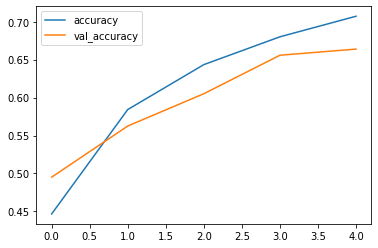

In [37]:
losses[['accuracy','val_accuracy']].plot();

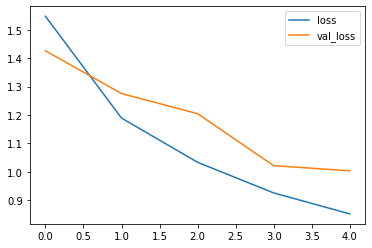

In [41]:
losses[['loss','val_loss']].plot()

In [38]:
model.metrics_names

['loss', 'accuracy']

In [40]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0034687519073486, 0.6639000177383423]


In [42]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [43]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1000
           1       0.69      0.88      0.78      1000
           2       0.57      0.55      0.56      1000
           3       0.51      0.49      0.50      1000
           4       0.73      0.45      0.55      1000
           5       0.60      0.54      0.57      1000
           6       0.60      0.86      0.71      1000
           7       0.77      0.68      0.72      1000
           8       0.80      0.72      0.76      1000
           9       0.71      0.75      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [44]:
confusion_matrix(y_test,predict_classes)

array([[729,  38,  46,  19,   9,   4,  15,   7,  78,  55],
       [ 15, 883,   5,   5,   1,   4,  17,   3,  14,  53],
       [ 69,  22, 547,  67,  46,  71, 114,  29,  14,  21],
       [ 32,  37,  63, 492,  36, 133, 136,  30,  16,  25],
       [ 32,  16, 130,  80, 446,  44, 154,  70,  17,  11],
       [ 19,  13,  75, 178,  24, 541,  79,  46,   8,  17],
       [  3,  19,  40,  39,   4,  17, 857,   8,   5,   8],
       [ 27,  21,  36,  50,  40,  72,  29, 680,   2,  43],
       [ 84,  74,  14,  23,   6,   5,   8,   1, 717,  68],
       [ 27, 150,   6,  18,   0,   8,   9,  13,  22, 747]])

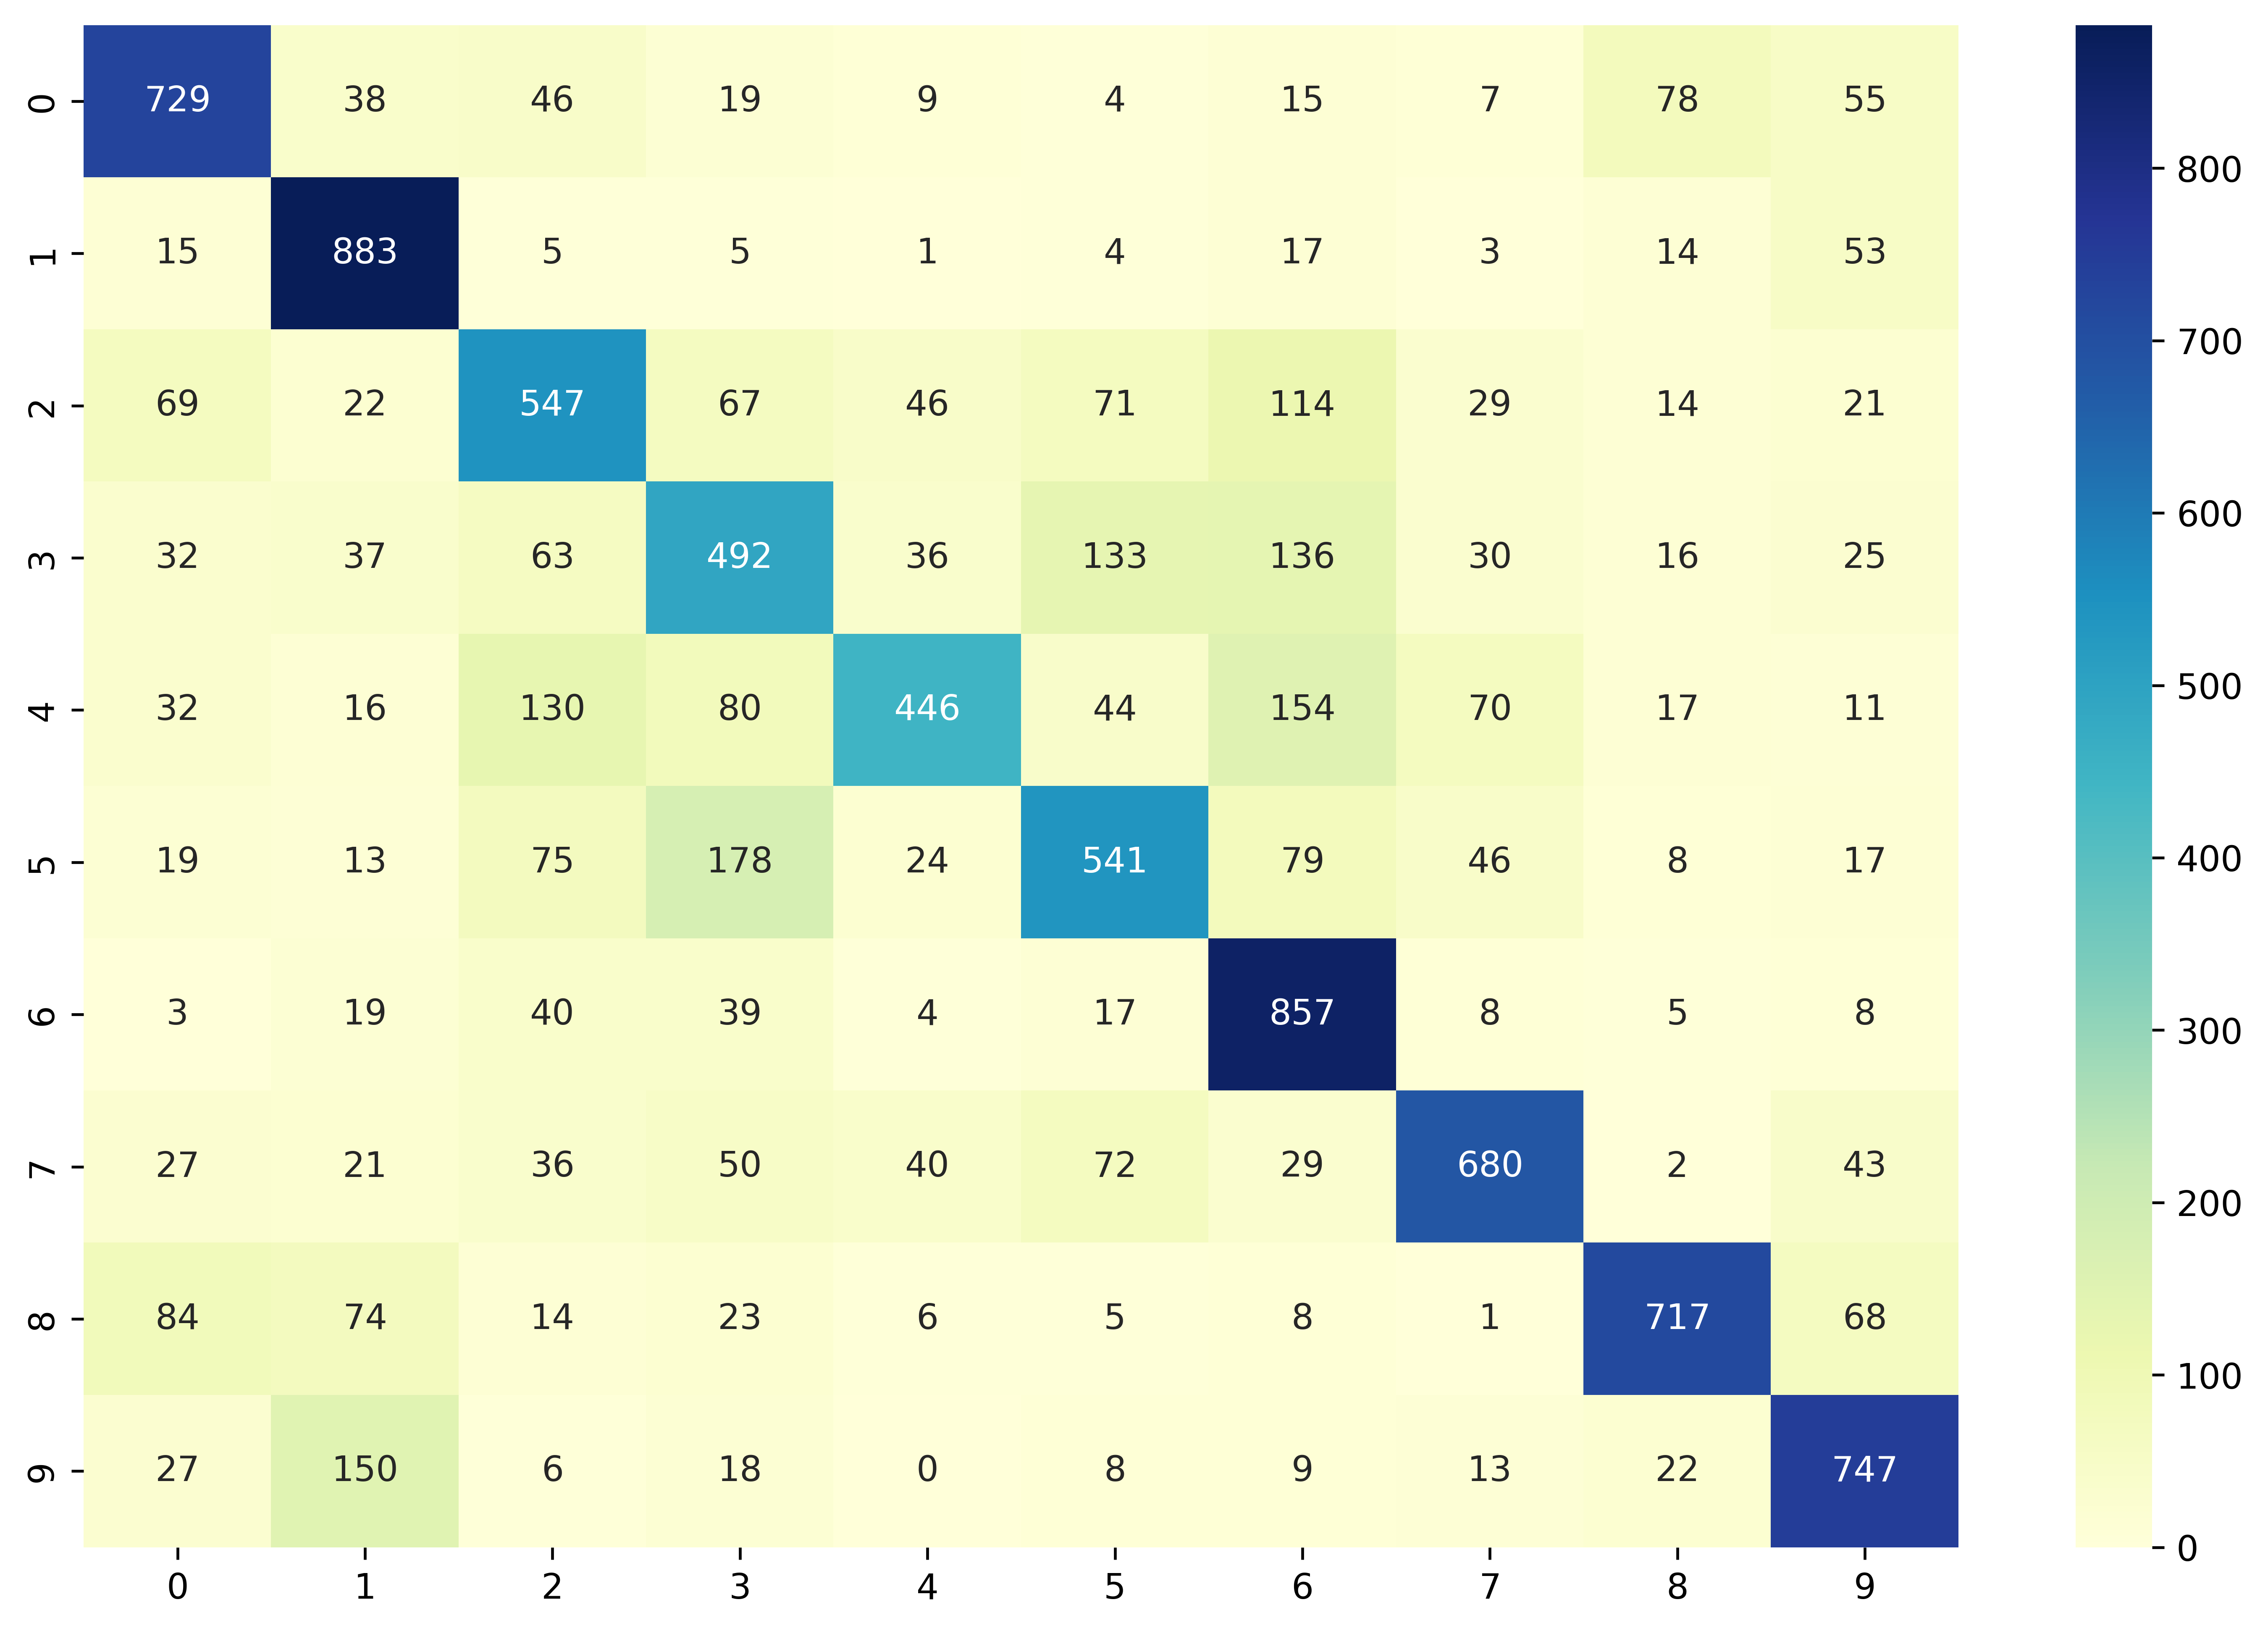

In [45]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

In [49]:
my_image = x_test[16]

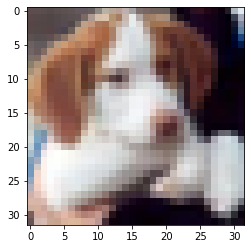

In [50]:
plt.imshow(my_image);

In [51]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 53ms/step


array([[0.000092, 0.000147, 0.001927, 0.236963, 0.000034, 0.750283,
        0.009124, 0.001299, 0.000071, 0.000061]], dtype=float32)